# Ternary Vapor-Liquid Equilibrium: Pentane/Hexane/Heptane

## Upgrade the Package `chbe444umd`
+ Upgrading will enable you to access its latest capabilities.
+ To install, run:
  >`%pip install chbe444umd`
+ To upgrade, run:
  >`%pip install --upgrade chbe444umd`
+ Restart the kernel after installing or upgrading.

## 1. Specify Ternary System and Perform VLE Calculations

### 1.1 Specify ternary system

In [1]:
import chbe444umd as des

%config InlineBackend.figure_format='svg'
%matplotlib inline

sys567 = des.TernarySystem(
    component_ids=('pen', 'hex', 'hep'),
    component_names={'n-pentane',
                     'n-hexane',
                     'n-heptane'},
    axes={'pen': 0, 'hep': 1},
    Antoine={'pen': {'A': 3.989,   'B': 1070.617, 'C': -40.454},
             'hex': {'A': 4.00266, 'B': 1171.53,  'C': -48.784},
             'hep': {'A': 4.02832, 'B': 1268.636, 'C': -56.199}},
             Wilson_a={'pen': {'pen': 0, 'hex': 0, 'hep': 0},
                       'hex': {'pen': 0, 'hex': 0, 'hep': 0},
                       'hep': {'pen': 0, 'hex': 0, 'hep': 0}},
             Wilson_b={'pen': {'pen': 0, 'hex': 0, 'hep': 0},
                       'hex': {'pen': 0, 'hex': 0, 'hep': 0},
                       'hep': {'pen': 0, 'hex': 0, 'hep': 0}}
)

### 1.2 Plot equilibrium field

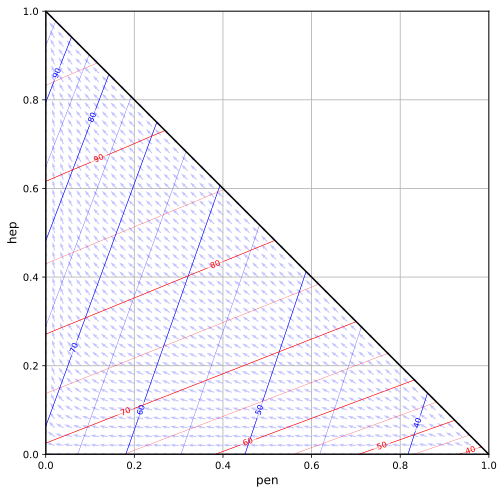

In [2]:
fig, ax, _ = sys567.plot_vle_field(
    n_vectors=51, arrow_scale=51,
    contour_T_heavy=10, contour_T_medium=5, contour_T_light=1)

### 1.3 Query VLE properties

In [3]:
sys567.Psat([68.3])

array([[2.70449151, 0.38096272, 0.99931175]])

In [4]:
sys567.Psat([35.7, 68.3])

array([[1.00012564, 0.10162998, 0.31471605],
       [2.70449151, 0.38096272, 0.99931175]])

In [5]:
sys567.gamma([0.32, 0.40, 0.28], 55)

array([1., 1., 1.])

In [6]:
sys567.gamma([[0.32, 0.40, 0.28], [0.20, 0.10, 0.70]], [40, 55])

array([[1., 1., 1.],
       [1., 1., 1.]])

In [7]:
sys567.delx([0.32, 0.4, 0.28])

array([-0.35789955,  0.28918972,  0.06870983])

In [8]:
print(sys567.vle_properties([0.32, 0.4, 0.28]))

Mixture VLE properties:
    Pressure (P, bar): 1.013
    Overall composition (z): [0.32 0.4  0.28]
    If this mixture were a saturated liquid:
        Vapor in equilibrium (yeq): [0.678 0.111 0.211]
        Bubble T (T_bubl, °C): 60.032
    If this mixture were a saturated vapor:
        Liquid in equilibrium (xeq): [0.088 0.712 0.2  ]
        Dew T (T_dew, °C): 79.932 °C
    Compositions are reported as mole fractions



In [9]:
print(sys567.vle_properties([[0.32, 0.4, 0.28], [0.50, 0.10, 0.40]], decimals=4))

Mixture VLE properties:
    Pressure (P, bar): 1.0130
    Overall composition (z):
	[[0.32 0.4  0.28]
	 [0.5  0.1  0.4 ]]
    If this mixture were a saturated liquid:
        Vapor in equilibrium (yeq):
		[[0.6779 0.1108 0.2113]
		 [0.7725 0.0182 0.2093]]
        Bubble T (T_bubl, °C):
		[60.0322 49.457 ]
    If this mixture were a saturated vapor:
        Liquid in equilibrium (xeq):
		[[0.0884 0.7121 0.1995]
		 [0.2132 0.3156 0.4712]]
        Dew T (T_dew, °C):
		[79.9324 63.6072] °C
    Compositions are reported as mole fractions



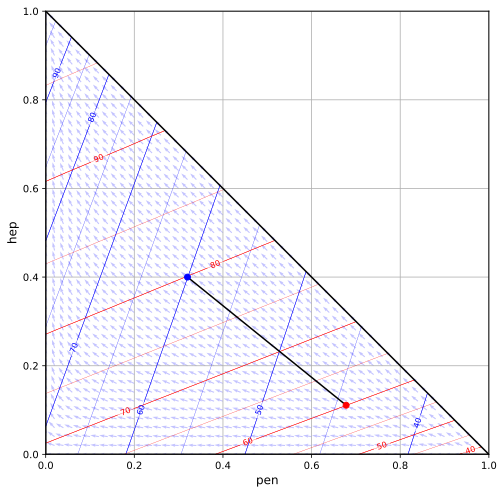

In [10]:
x = [0.32, 0.40, 0.28]
y = sys567.vle_properties(x).yeq

fig1, ax1 = des.duplicate_figure(fig)
ax1.plot([x[0], y[0]], [x[1], y[1]], 'k-')
ax1.plot(x[0], x[1], 'bo', markersize=6)
ax1.plot(y[0], y[1], 'ro', markersize=6)
fig1

## 2. Integrate Residue Curves

### 2.1 Method 1: Feed array

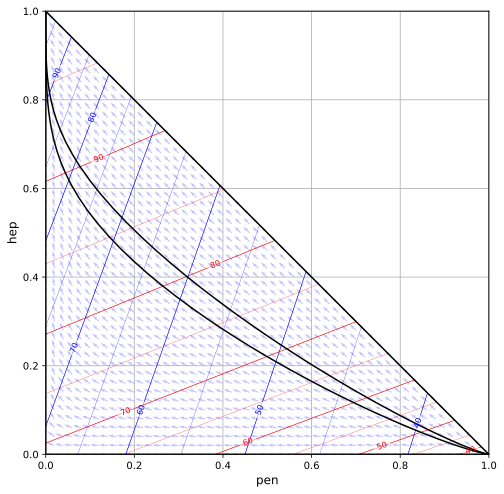

In [11]:
sys567.plot_residue_curve(ax, feed=[[0.33, 0.33, 0.34],
                                    [0.32, 0.40, 0.28]],
                          show_feed=True, max_step=0.1, color='k', ls='-', lw=1.5)
fig

### 2.2 Method 2: Feed dictionary

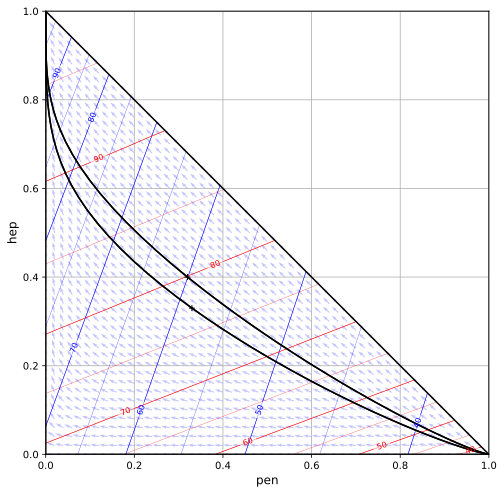

In [12]:
sys567.plot_residue_curve(ax, feed={0: {'pen': 0.33, 'hex': 0.34, 'hep': 0.33},
                                    1: {'pen': 0.32, 'hex': 0.28, 'hep': 0.40}},
                          max_step=0.1, show_feed=True, marker='+', color='k', lw=1.5)
fig

## 3. Perform Ternary Flash Calculations

### 3.1 Flash at a specified ``T``

Flash results:
    Feed: [0.33 0.33 0.34]
    Liquid product (x): [0.14142 0.54173 0.31685]
    Vapor product (y): [0.41704 0.23228 0.35069]
    Temperature (T, °C): 72.00000
    Pressure (P, bar): 1.01300
    Liquid fraction (Lfrac): 0.31579
    Vapor fraction (Vfrac): 0.68421
    Compositions are reported as mole fractions



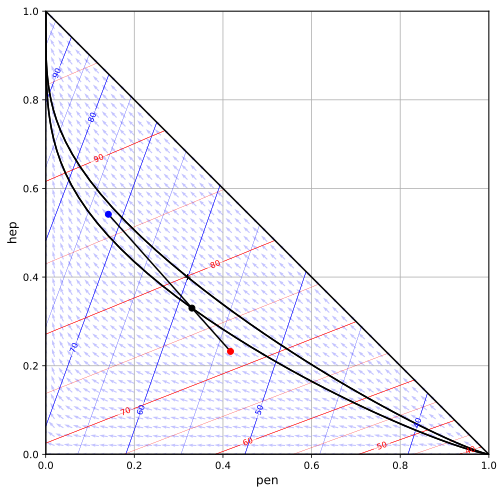

In [13]:
xF = [0.33, 0.33, 0.34]
res = sys567.flash_at_T(xF, T=72, decimals=5)
print(res)
x = res.x
y = res.y

ax.plot([x[0], xF[0], y[0]], [x[1], xF[1], y[1]], 'k-')
ax.plot(x[0], x[1], 'bo', markersize=6)
ax.plot(xF[0], xF[1], 'ko', markersize=6)
ax.plot(y[0], y[1], 'ro', markersize=6)
fig

### 3.2 Flash at a specified ``Vfrac``

Flash results:
    Feed: [0.33 0.33 0.34]
    Liquid product (x): [0.142 0.54  0.318]
    Vapor product (y): [0.418 0.231 0.351]
    Temperature (T, °C): 71.921
    Pressure (P, bar): 1.013
    Liquid fraction (Lfrac): 0.320
    Vapor fraction (Vfrac): 0.680
    Compositions are reported as mole fractions



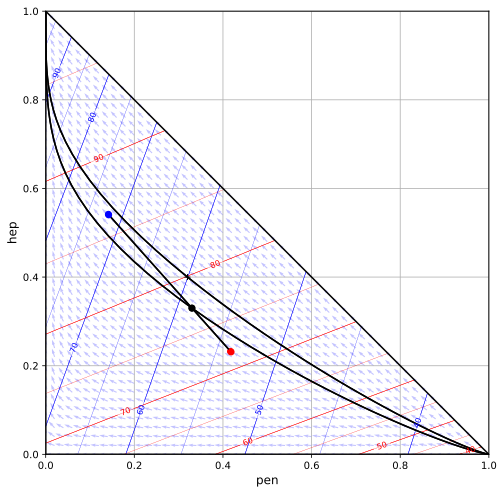

In [14]:
xF = [0.33, 0.33, 0.34]
res = sys567.flash_at_Vfrac(xF, Vfrac=0.68)
print(res)
x = res.x
y = res.y

ax.plot([x[0], xF[0], y[0]], [x[1], xF[1], y[1]], 'k-')
ax.plot(x[0], x[1], 'bo', markersize=6)
ax.plot(xF[0], xF[1], 'ko', markersize=6)
ax.plot(y[0], y[1], 'ro', markersize=6)
fig

### 3.3 Draw BFD of flash evaporator

(<Figure size 640x480 with 1 Axes>, <Axes: >)

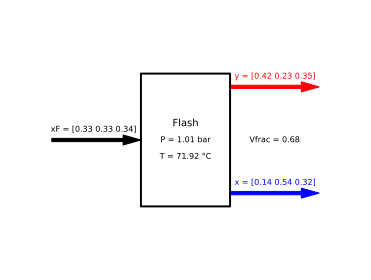

In [15]:
sys567.draw_flash_bfd(res)